In [1]:
import pandas as pd
import numpy as np

In [2]:
# temp = pd.read_csv("data/census/ss10pusa.csv")
# AGEP,WKHP,PERNP,WKW,ADJINC,SCHL,FOD1P,FOD2P
cols_to_keep = ["AGEP", "FOD1P", "WAGP", "SCHL", "COW", "SEX"]
temp_df2020 = pd.read_csv('data/census/psam_pusa.csv', usecols = cols_to_keep) 

In [3]:
temp_df2020.head()

,AGEP,COW,SCHL,SEX,WAGP,FOD1P
0,68,NaN,16.0,1,0.0,NaN
1,18,1.0,18.0,2,4800.0,NaN
2,35,NaN,16.0,2,0.0,NaN
3,46,NaN,18.0,2,0.0,NaN
4,79,NaN,22.0,2,0.0,2301.0


In [4]:
majors_list = pd.read_csv("data/raw/majors-list.csv")
majors_list.head()

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [5]:
# Drop all the na value in field of degree
temp_df2020 = temp_df2020.dropna(axis = 0)

In [6]:
# Only get the major code, major name, and major category
grad_students = pd.read_csv("data/raw/grad-students.csv")
grad_students2 = grad_students[["Major_code", "Major", "Major_category"]]
grad_students2.head()

,Major_code,Major,Major_category
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts
2,6211,HOSPITALITY MANAGEMENT,Business
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics


In [7]:
# Give the major name and major category to the temp table
temp_df2020b = pd.merge(temp_df2020, grad_students2, left_on = "FOD1P", right_on = "Major_code")
temp_df2020b

,AGEP,COW,SCHL,SEX,WAGP,FOD1P,Major_code,Major,Major_category
0,27,1.0,22.0,2,0.0,6207.0,6207,FINANCE,Business
1,27,1.0,22.0,2,0.0,6207.0,6207,FINANCE,Business
2,25,1.0,21.0,1,30500.0,6207.0,6207,FINANCE,Business
3,37,2.0,21.0,2,60000.0,6207.0,6207,FINANCE,Business
4,57,6.0,21.0,1,0.0,6207.0,6207,FINANCE,Business
...,...,...,...,...,...,...,...,...,...
289734,40,1.0,21.0,1,50000.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289735,78,7.0,21.0,1,10400.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289736,58,7.0,21.0,1,21600.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289737,25,1.0,22.0,1,40000.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering


In [8]:
# Convert integer value to words
temp_df2020b["COW"] = np.where((temp_df2020b["COW"] == 9) | (temp_df2020b["COW"] == 8), "Unemployed", "Employed")
temp_df2020b

,AGEP,COW,SCHL,SEX,WAGP,FOD1P,Major_code,Major,Major_category
0,27,Employed,22.0,2,0.0,6207.0,6207,FINANCE,Business
1,27,Employed,22.0,2,0.0,6207.0,6207,FINANCE,Business
2,25,Employed,21.0,1,30500.0,6207.0,6207,FINANCE,Business
3,37,Employed,21.0,2,60000.0,6207.0,6207,FINANCE,Business
4,57,Employed,21.0,1,0.0,6207.0,6207,FINANCE,Business
...,...,...,...,...,...,...,...,...,...
289734,40,Employed,21.0,1,50000.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289735,78,Employed,21.0,1,10400.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289736,58,Employed,21.0,1,21600.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289737,25,Employed,22.0,1,40000.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering


In [9]:
# number of employed people
np.sum(temp_df2020b["COW"] == "Employed")

288228

## Data from 2010

In [10]:
temp_df2010 = pd.read_csv('data/census/ss10pusa.csv', usecols = cols_to_keep) 
temp_df2010.head()

,AGEP,COW,SCHL,SEX,WAGP,FOD1P
0,75,NaN,16.0,2,0.0,NaN
1,25,4.0,22.0,1,17000.0,5007.0
2,26,4.0,19.0,2,13000.0,NaN
3,3,NaN,1.0,1,NaN,NaN
4,87,NaN,19.0,2,0.0,NaN


In [11]:
# function to combine two datasets then we have a new dataset with defined values instead of integer value
def combine2table(table1, table2):
    table1 = table1.dropna(axis = 0)
    
    # convert employment structure
    result = pd.merge(table1, table2, left_on = "FOD1P", right_on = "Major_code")
    result["COW"] = np.where((result["COW"] == 9) | (result["COW"] == 8), "Unemployed", "Employed")
    
    # convert education attainment
    result = result.loc[(result["SCHL"] == 21) | (result['SCHL'] == 22)]
    result["SCHL"] = np.where(result["SCHL"] == 21, "Bachelor", "Master")
    return result

In [12]:
temp_df2010b = combine2table(temp_df2010, grad_students2)
temp_df2010b

,AGEP,COW,SCHL,SEX,WAGP,FOD1P,Major_code,Major,Major_category
0,25,Employed,Master,1,17000.0,5007.0,5007,PHYSICS,Physical Sciences
1,34,Employed,Master,2,39000.0,5007.0,5007,PHYSICS,Physical Sciences
2,53,Employed,Bachelor,1,50000.0,5007.0,5007,PHYSICS,Physical Sciences
4,32,Employed,Master,2,22000.0,5007.0,5007,PHYSICS,Physical Sciences
6,53,Employed,Master,1,128000.0,5007.0,5007,PHYSICS,Physical Sciences
...,...,...,...,...,...,...,...,...,...
282608,27,Employed,Master,1,30000.0,4006.0,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,Biology & Life Science
282609,39,Employed,Master,1,225000.0,4006.0,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,Biology & Life Science
282611,29,Employed,Bachelor,1,26500.0,4006.0,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,Biology & Life Science
282614,32,Employed,Master,2,69000.0,4006.0,4006,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,Biology & Life Science


In [13]:
np.sum(temp_df2010b["COW"] == "Employed")

247745

In [88]:
# # np.unique(temp_df2010b["SCHL"])
# temp_dff = temp_df2010b.copy()
# # Only get the Bachelor and Master degree
# temp_dff = temp_dff.loc[(temp_dff["SCHL"] == 21) | (temp_dff['SCHL'] == 22)]
# temp_dff["SCHL"] = np.where(temp_dff["SCHL"] == 21, "Bachelor", "Master")
# # np.unique(temp_dff["SCHL"])
# temp_dff

In [14]:
temp_df2020c = combine2table(temp_df2020, grad_students2)
temp_df2020c

,AGEP,COW,SCHL,SEX,WAGP,FOD1P,Major_code,Major,Major_category
0,27,Employed,Master,2,0.0,6207.0,6207,FINANCE,Business
1,27,Employed,Master,2,0.0,6207.0,6207,FINANCE,Business
2,25,Employed,Bachelor,1,30500.0,6207.0,6207,FINANCE,Business
3,37,Employed,Bachelor,2,60000.0,6207.0,6207,FINANCE,Business
4,57,Employed,Bachelor,1,0.0,6207.0,6207,FINANCE,Business
...,...,...,...,...,...,...,...,...,...
289734,40,Employed,Bachelor,1,50000.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289735,78,Employed,Bachelor,1,10400.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289736,58,Employed,Bachelor,1,21600.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering
289737,25,Employed,Master,1,40000.0,2403.0,2403,ARCHITECTURAL ENGINEERING,Engineering


In [15]:
np.sum(temp_df2020c["SCHL"] == "Master"), np.sum(temp_df2010b["SCHL"] == "Master")

(79071, 72479)

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [42]:
temp_df2020d = temp_df2020c[["SCHL", "Major_category", "SEX"]]
temp_df2020d = temp_df2020d[temp_df2020d["SCHL"] == "Master"]

temp_df2010c = temp_df2010b[["SCHL", "Major_category", "SEX"]]
temp_df2010c = temp_df2010c[temp_df2010c["SCHL"] == "Master"]

<AxesSubplot:xlabel='Major_category', ylabel='count'>

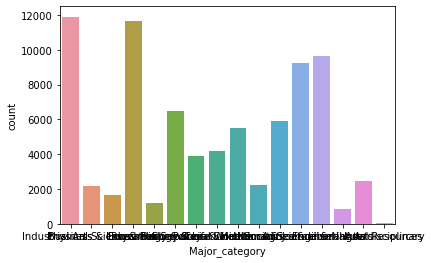

In [44]:
sns.countplot(x = "Major_category", data = temp_df2020d)

<AxesSubplot:xlabel='Major_category', ylabel='count'>

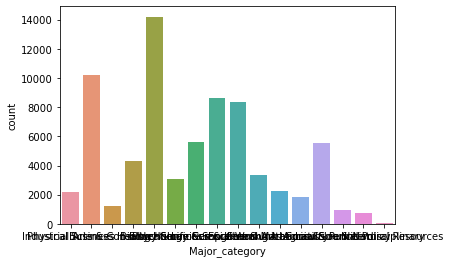

In [24]:
sns.countplot(x = "Major_category", data = temp_df2010c)

In [51]:
# temp_df2020d
# temp_df2020e

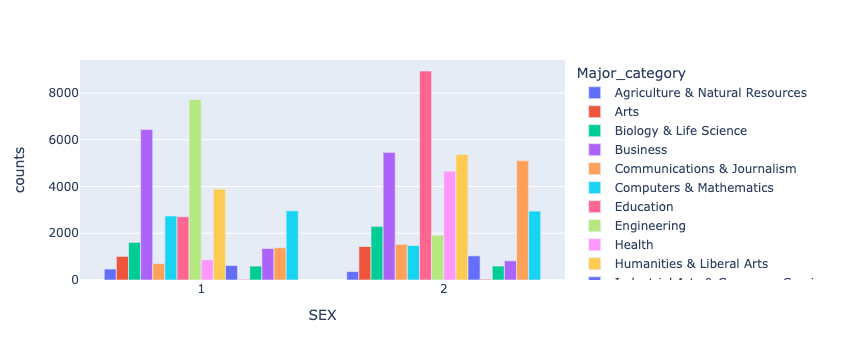

In [52]:
temp_df2020e = temp_df2020d.groupby(by=["Major_category", "SEX"]).size().reset_index(name="counts")
fig = px.bar(data_frame=temp_df2020e, x="SEX", y="counts", color = "Major_category", barmode="group")
fig.show()

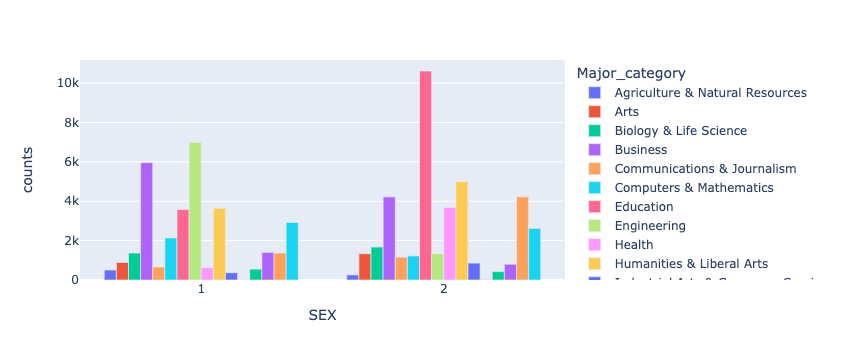

In [54]:
temp_df2010d = temp_df2010c.groupby(by=["Major_category", "SEX"]).size().reset_index(name="counts")
fig = px.bar(data_frame=temp_df2010d, x="SEX", y="counts", color = "Major_category", barmode="group")
fig.show()

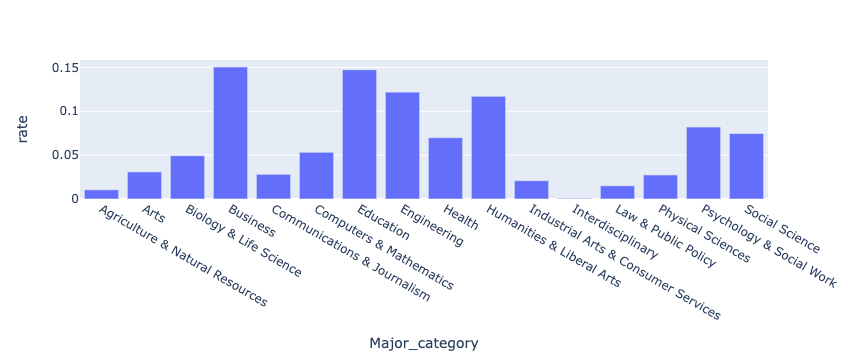

In [33]:
temp_df2020e["rate"] = temp_df2020e["counts"] / sum(temp_df2020e["counts"])
fig = px.bar(data_frame=temp_df2020e, x="Major_category", y="rate", barmode="group")
fig.show()

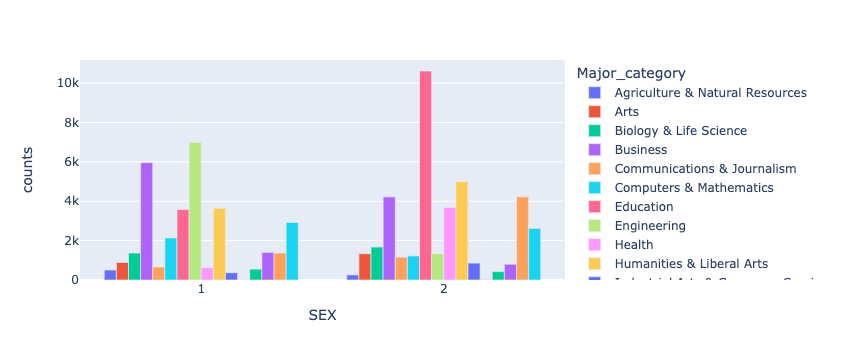

In [53]:
temp_df2010d = temp_df2010c.groupby(by=["Major_category", "SEX"]).size().reset_index(name="counts")
fig = px.bar(data_frame=temp_df2010d, x="SEX", y="counts", color = "Major_category", barmode="group")
fig.show()

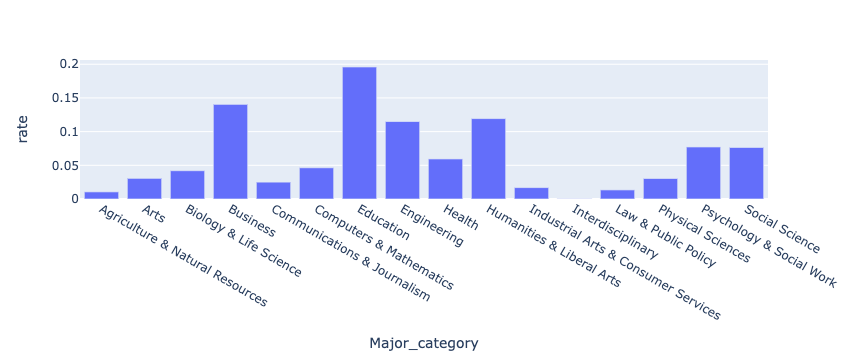

In [35]:
temp_df2010d["rate"] = temp_df2010d["counts"] / sum(temp_df2010d["counts"])
fig = px.bar(data_frame=temp_df2010d, x="Major_category", y="rate", barmode="group")
fig.show()

TypeError: can't multiply sequence by non-int of type 'float'

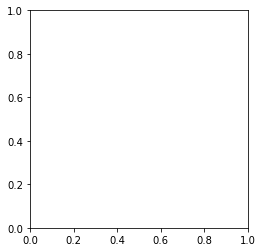

In [41]:
plt.pie(temp_df2010d["counts"], temp_df2010d["Major_category"], autopct='%.0f%%')
plt.show()